In [45]:
%matplotlib inline

#show account balance
import sys
# this is to be abel to use all the code in the voltrad1 project
sys.path.append("../")
import pandas as pd
import sqlite3
from volsetup.logger import logger
from volsetup import config
from operations.accounting import read_historical_acc_summary_from_sqllite
globalconf = config.GlobalConfig()
log = logger("ipython")
df1 = read_historical_acc_summary_from_sqllite(globalconf,log,"DU242089")


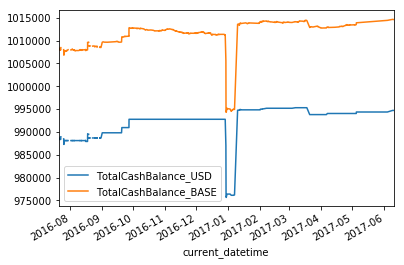

In [64]:
x_col = 'current_datetime'
y_cols = ['TotalCashBalance_USD','TotalCashBalance_BASE']
df2=df1.loc[:,[x_col] + y_cols].dropna()
df2.loc[:,y_cols] \
    = df2.loc[:,y_cols].apply(pd.to_numeric, errors='coerce')
df2.loc[:,x_col]=pd.to_datetime(df2.loc[:,x_col], format="%Y-%m-%d %H:%M:%S")
df2.index = df2[x_col]
del df2[x_col]
df2.plot()

In [63]:
df2.dtypes

current_datetime         datetime64[ns]
TotalCashBalance_USD             object
TotalCashBalance_BASE            object
dtype: object